# Instance Based Learning (Support Vector Machine Classifier)

In this notebook, we will use the scikit-learn package to implement a SVM model for car acceptability classification.

### 1. Data Loading and Try the Model without Parameter Tuning

We first load the training set and the test set (.NPY files).

In [1]:
import numpy as np

# Load the Data
xs_test = np.load('data/xs_test.npy')
xs_train = np.load('data/xs_train.npy')
ys_test = np.load('data/ys_test.npy')
ys_train = np.load('data/ys_train.npy')


What's more, the dictionary files (.CSV) are also loaded.

In [2]:
import csv

att_dic = {}
class_dic = {}

# read the .csv files back to the dictionaries
with open('data/att_dic.csv', 'r') as w:
    csvreader = csv.reader(w)
    for row in csvreader:
        att_dic[row[0]] = row[1]

with open('data/class_dic.csv', 'r') as w:
    csvreader = csv.reader(w)
    for row in csvreader:
        class_dic[row[0]] = row[1]


Once the data is loaded, we try to use the SVC() model of sklearn package to define and train a support vector machine model with no paramater tuning so that we can compare its prediction performance with that after paramater tuning.

In [3]:
from sklearn.svm import SVC

# Call the SVC class of sklearn package
svm_clf_no_tuning = SVC()

# train the untuned model using our training data
svm_clf_no_tuning.fit(xs_train, np.ravel(ys_train))

SVC()

### 2. Parameter Tuning

To tune our hyperparameters, we use GridSearchCV() method which iterates through each given parameter to assess the weighted F1 score of the given training data. For each combination of the given parameters, the search also validates using 5-fold cross validation.

There are a large number of parameters of the SVC() model, here we focus on the following 3 of them:

- <b>C:</b> A parameter that controls the error in which the decision boundary can be made. A low c will lead to low error and a high c will lead to high. 

- <b>kernal:</b> A parameter controlling the kernel type to be used in the model. It can be set as <b>'linear'</b> (find the optimal decision boundary in a 2D environment) or <b>'rbf'</b> (find the optimal decision boundary in 3D space).

- <b>gamma:</b> A specific parameter for the 'rbf' kernel which controls the curvature of the decision boundary in 3D space. A higher Gamma can lead to overfitting and poor test results.


In [4]:
# import GridSearch Class
from sklearn.model_selection import GridSearchCV, KFold

# define the parameters to iterate through
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

# define a SVM classifier instance
svm_clf = SVC(random_state=100)

# peform Grid Search with 5-fold cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=41)                         
grid = GridSearchCV(svm_clf, param_grid, cv=cv, verbose=2,scoring='f1_weighted')
grid_result=grid.fit(xs_train, np.ravel(ys_train))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

Once the grid search has finished, we print the best possible set of parameters for the model.

In [5]:
print(
    "The best parameters are %s with a weighted F1 score of %0.4f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 10, 'gamma': 1, 'kernel': 'rbf'} with a weighted F1 score of 0.9768


### 3. Model Training and Evaluation

Then, using the best combination of hyperparameters output by the grid search, we construct and train a SVM classifier on the training set.

In [6]:
# Define a new SVM using the given parameters
svm_clf_tuning = SVC(C=10, gamma=1, kernel='rbf',
                     random_state=888, probability=True)

# Train the model
svm_clf_tuning.fit(xs_train, np.ravel(ys_train))


SVC(C=10, gamma=1, probability=True, random_state=888)

In order to use the trained model again in the Model Ensemble Part, we save the model with joblib() method in sklearn.

In [7]:
import joblib

# save the trained SVM model
joblib.dump(svm_clf_tuning, 'models/Instance_Based_SVM.model')

['models/Instance_Based_SVM.model']

Finally, we evaluate the SVM models both before and after parameter tuning by making classification reports on the test set. 

According to the results, the parameter tuning has obviously increased the performance of the model for each metric of the tuned model is lager than that of the untuned model.

In [8]:
from sklearn.metrics import classification_report

# predict the ys with xs of training set and test set
ys_test_pred_no_tuning = svm_clf_no_tuning.predict(xs_test)
ys_test_pred_tuning = svm_clf_tuning.predict(xs_test)

# print the classfication report
print('Classification Report of SVM (before Parameter Tuning) on the Test set: \n\n',
      classification_report(ys_test, ys_test_pred_no_tuning, digits=4))
      
print('Classification Report of SVM (after Parameter Tuning) on the Test set: \n\n',
      classification_report(ys_test, ys_test_pred_tuning, digits=4))

Classification Report of SVM (before Parameter Tuning) on the Test set: 

               precision    recall  f1-score   support

           0     0.9793    0.9752    0.9772       242
           1     0.8889    0.9351    0.9114        77
           2     1.0000    0.7692    0.8696        13
           3     0.8571    0.8571    0.8571        14

    accuracy                         0.9538       346
   macro avg     0.9313    0.8842    0.9038       346
weighted avg     0.9550    0.9538    0.9537       346

Classification Report of SVM (after Parameter Tuning) on the Test set: 

               precision    recall  f1-score   support

           0     0.9959    1.0000    0.9979       242
           1     0.9870    0.9870    0.9870        77
           2     1.0000    0.8462    0.9167        13
           3     0.9333    1.0000    0.9655        14

    accuracy                         0.9913       346
   macro avg     0.9791    0.9583    0.9668       346
weighted avg     0.9915    0.9913   

We also plot a Confusion Matrix Heatmap by using the seaborn package in order to better present the classification results of the tuned SVM model.

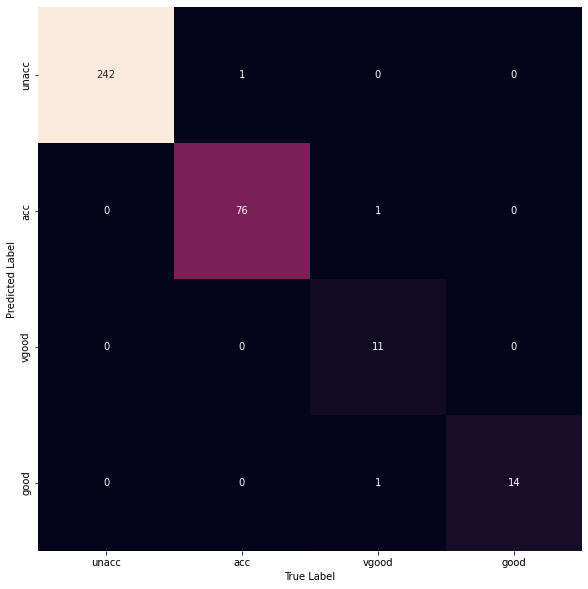

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# construct a confusion matrix which shows the accuracy on each class
mat = confusion_matrix(ys_test, ys_test_pred_tuning)

# plot the confusion matrix into a heatmap
plt.subplots(figsize=(10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=class_dic.values(), yticklabels=class_dic.values())
# set the x and y label of the figure
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()